<a href="https://colab.research.google.com/github/jakubtwalczak/dsbootcampudemy/blob/main/6_Uczenie_maszynowe/7_Algorytm_K_s%C4%85siad%C3%B3w.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wprowadzenie.

Podstawą działania algorytmu jest:
* znalezienie z góry określonej liczby próbek treningowych znajdujących się najbliżej naszej obserwacji
* przewidzenie na ich podstawie etykiety

Liczba sąsiadów i sposób kalkulacji odległości (domyślnie euklidesowa) określana może być przez użytkownika.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Importujemy zbiór danych dot. kosaćca.

In [2]:
from sklearn.datasets import load_iris
raw_data = load_iris()
raw_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

Dane przypiszmy do obiektu typu dataframe.

In [3]:
df1 = pd.DataFrame(data=raw_data.data, columns=raw_data.feature_names)
df2 = pd.DataFrame(data=raw_data.target, columns=['class'])
df = pd.concat([df1, df2], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


# Wykres rozproszenia.

Wykres ten tworzymy przy pomocy funkcji **pairplot** z biblioteki Seaborn. Szczegóły tworzenia tego typu wykresów omówione były w module dot. wizualizacji.

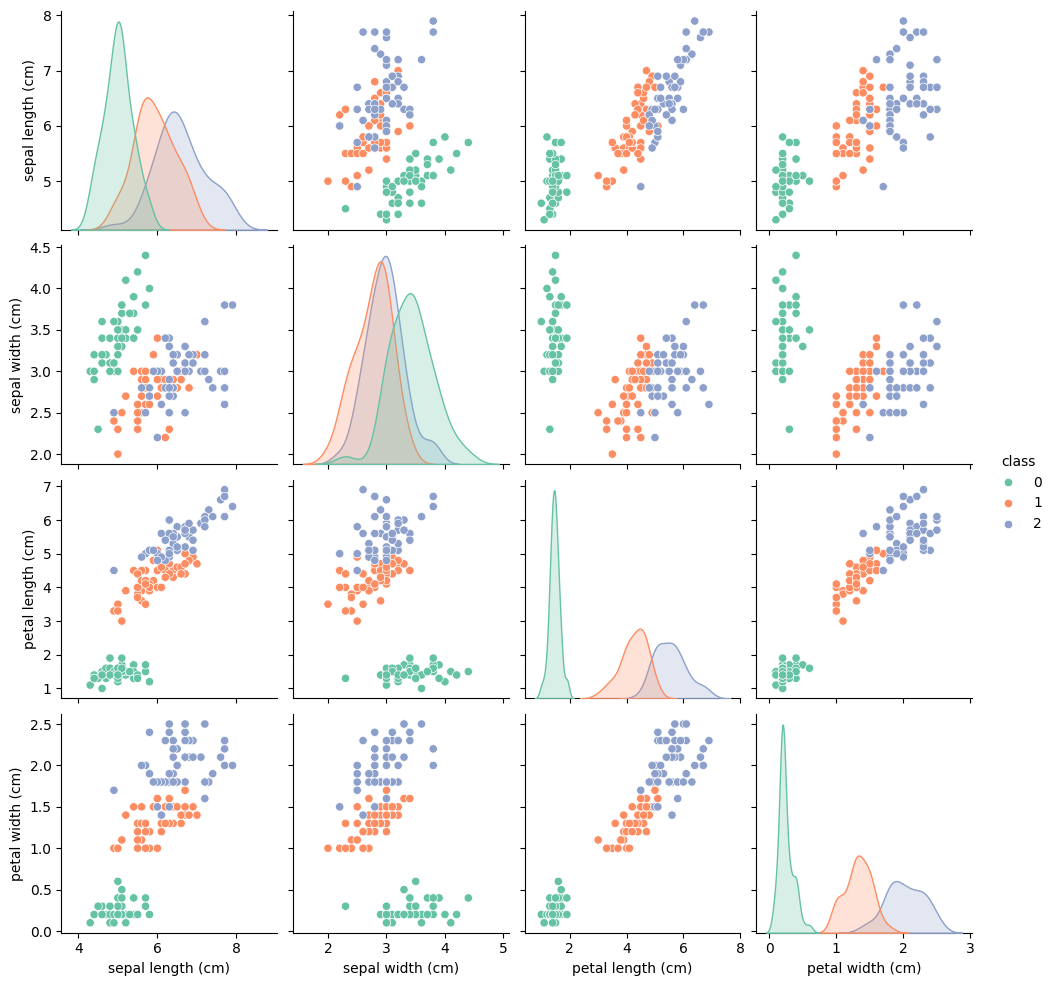

In [5]:
_ = sns.pairplot(df, hue='class', palette='Set2')

Petal length i petal width są to zmienne, które pozwalają na łatwe rozgraniczenie między klasami, więc odrzucimy je, aby klasyfikacja nie była zbyt łatwa dla modelu.

Możemy wyświetlić też macierz dot. korelacji - wyraźnie wskazuje ona na bardzo wysoką korelację ww. zmiennych z klasą.

In [6]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
class,0.782561,-0.426658,0.949035,0.956547,1.000000


Wycinamy zatem z naszego zbioru zmiennych niezależnych tylko sepal length i sepal width.

In [7]:
X = raw_data.data
y = raw_data.target
X = X[:, :2]

print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (150, 2)
y shape: (150,)


Wykres punktowy zależności między oboma zmiennymi wskazuje, że klasa 0 jest łatwa do oddzielenia od pozostałych, ale już klasy 1 i 2 mocno się przenikają.

In [8]:
df = pd.DataFrame(X, columns=['sepal_length', 'sepal_width'])
target = pd.DataFrame(y, columns=['class'])
df = pd.concat([df, target], axis=1)
px.scatter(df, x='sepal_length', y='sepal_width', color='class', width=600, height=400)

# Tworzenie i dopasowanie modelu.

Importujemy klasę **KNeighborsClassifier**.

In [9]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X, y)

KNeighborsClassifier()

Dokładność modelu wynosi 0,84 wobec danych, na których był trenowany.

In [10]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
accuracy

0.84

# Wykres granic decyzyjnych.

Wykres ten ma na celu ukazanie nam graficznie płaszczyzny, w której znajdują się rekordy, oraz granic między klasami. Problemu nie było w przypadku klasy 0, ale dla klas 1 i 2, które nachodzą na siebie, wytyczenie granic nie jest już proste.

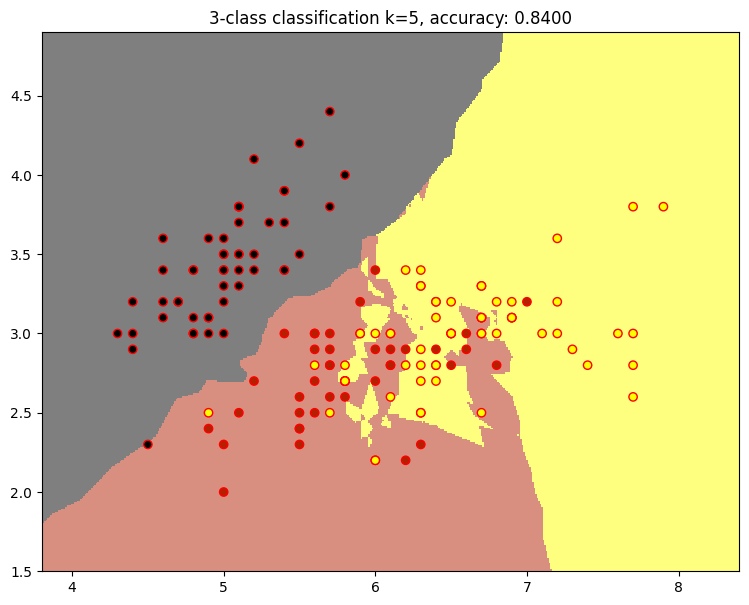

In [11]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
mesh = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(mesh)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(9, 7))
plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='gnuplot', edgecolors='r')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f'3-class classification k=5, accuracy: {accuracy:.4f}')
plt.show()

Teraz stworzymy pętlę, która pozwoli nam na spojrzenie, jak liczba sąsiadów wpływa na dokładność modelu opartego na omawianym algorytmie i wytyczenie granicy decyzyjnej.

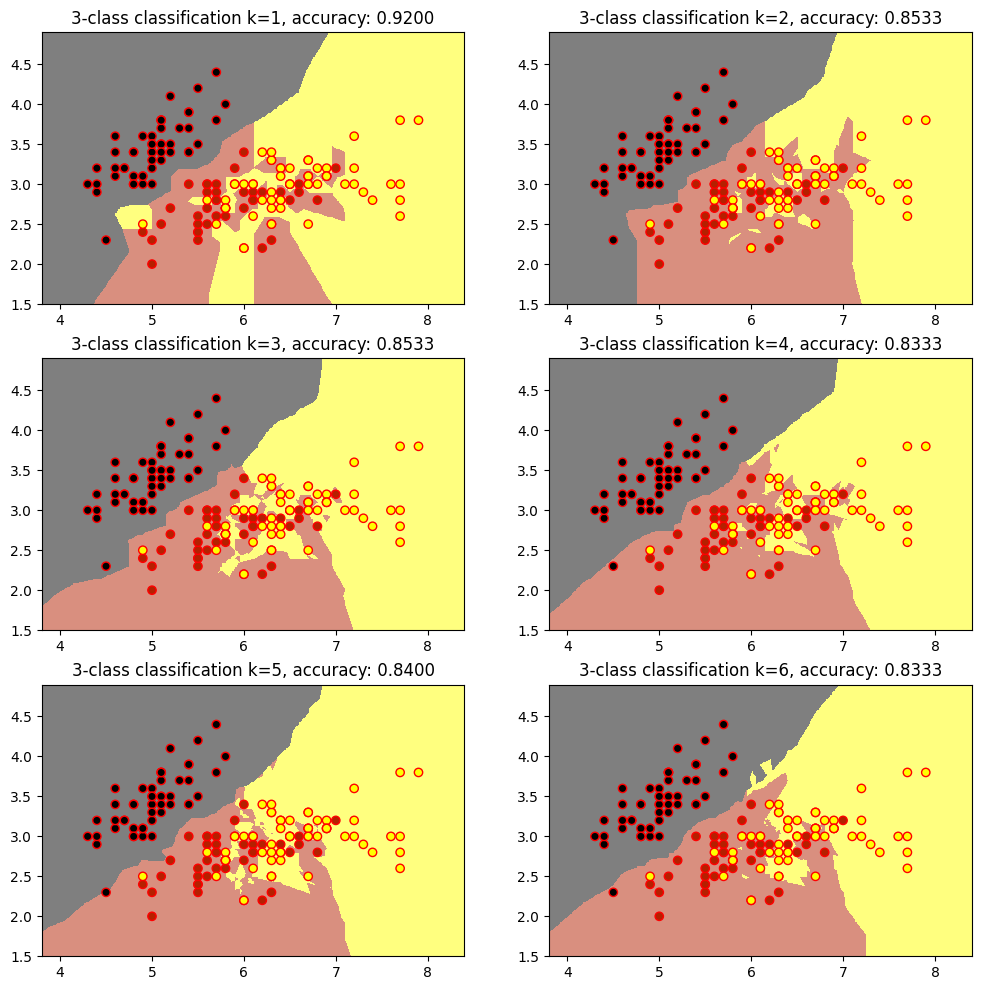

In [12]:
plt.figure(figsize=(12, 12))
for i in range(1, 7):
    plt.subplot(3, 2, i)
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X, y)
    accuracy = classifier.score(X, y)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    mesh = np.c_[xx.ravel(), yy.ravel()]
    Z = classifier.predict(mesh)
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='gnuplot', edgecolors='r')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'3-class classification k={i}, accuracy: {accuracy:.4f}')
plt.show()

Przy zaledwie jednym sąsiedzie model wydaje się być przeuczony; granice są bardzo dopasowane do konkretnych przykładów. Z niemal każdym kolejnym przyrostem liczby sąsiadów dokładność maleje, a granice decyzyjne bardziej się wyklarowują.

# Grid Search.

Aby znaleźć właściwą liczbę sąsiadów, zastosujemy przeszukiwanie tzw. przeszukiwanie siatki - metoda **GridSearchCV**. W ten sposób przeszukujemy wszystkie możliwe kombinacje parametrów i znajdujemy najbardziej optymalną.

Tworzymy siatkę parametrów jako słownik, następnie instancję klasyfikatora, potem instancję siatki (możemy wskazać mu liczbę iteracji w ramach walidacji krzyżowej), a na końcu trenujemy siatkę.

Sama walidacja krzyżowa polega na tym, że nasz zbiór danych dzielony jest na podaną liczbę części (w tym wypadku 5), potem po kolei na wszystkich prócz jednej algorytm jest trenowany, a na ostatniej testowany.

In [13]:
from sklearn.model_selection import GridSearchCV

grid_params = {'n_neighbors': range(2, 30)}

classifier = KNeighborsClassifier()

gs = GridSearchCV(classifier, grid_params, cv=5)
gs.fit(X, y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 30)})

Wyświetlmy więc po kolei najlepszą kombinację parametrów, najlepszy wynik modelu i instancję klasyfikatora.

In [14]:
print(gs.best_params_)
print(gs.best_score_)
print(gs.best_estimator_)

{'n_neighbors': 17}
0.82
KNeighborsClassifier(n_neighbors=17)


Przypiszmy liczbę sąsiadów, która jest najlepsza wg GridSearcha, do zmiennej.

In [15]:
k = gs.best_params_['n_neighbors']
k

17

Na końcu wyrysujmy ponownie wykres granic decyzyjnych - jak widzimy, są one już bardziej uogólnione względem modelu z jednym sąsiadem.

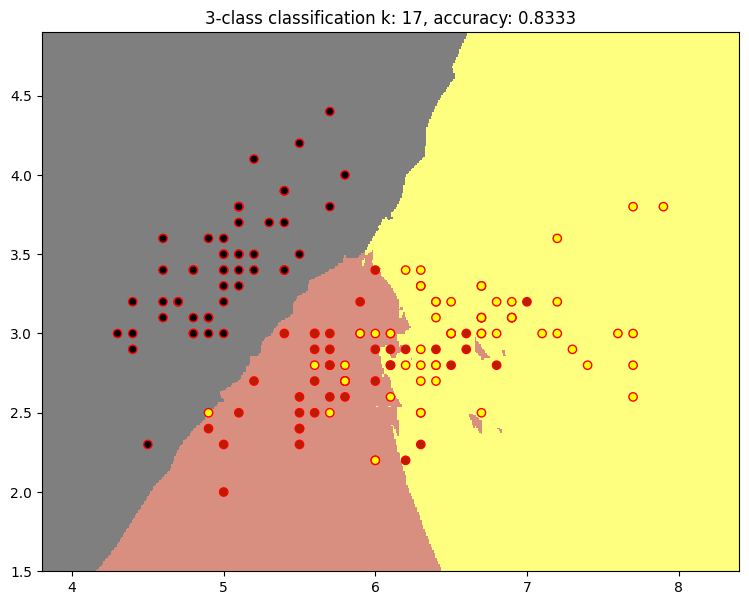

In [16]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
mesh = np.c_[xx.ravel(), yy.ravel()]
Z = gs.predict(mesh)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(9, 7))
plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='gnuplot', edgecolors='r')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f'3-class classification k: {k}, accuracy: {accuracy:.4f}')
plt.show()